Problem Statement:

Develop a predictive model to estimate the bike rental count (`cnt`) based on the given dataset, considering factors such as date, time, season, weather conditions, and other relevant features.

Column Decsription : 

1. **instant:** Sequential record number.

2. **dteday:** Date of the record in the format DD-MM-YYYY.

3. **season:** Season when the record was made (1: spring, 2: summer, 3: fall, 4: winter).

4. **yr:** Year of the record (0: 2011, 1: 2012).

5. **mnth:** Month of the record (1 to 12).

6. **hr:** Hour of the record (0 to 23).

7. **holiday:** Binary indicator of whether it's a holiday (1) or not (0).

8. **weekday:** Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday).

9. **workingday:** Binary indicator of whether it's a working day (1) or not (0).

10. **weathersit:** Weather situation (1: clear, 2: mist/cloudy, 3: light rain/snow, 4: heavy rain/snow).

11. **temp:** Normalized temperature on a scale of 0 to 1.

12. **atemp:** Normalized "feels-like" temperature on a scale of 0 to 1.

13. **hum:** Normalized humidity on a scale of 0 to 1.

14. **windspeed:** Normalized wind speed on a scale of 0 to 1.

15. **casual:** Count of casual bike rentals.

16. **registered:** Count of registered bike rentals.

17. **cnt:** Total count of bike rentals (casual + registered).

 hint by sir - remove register and casual 

In [2]:
import warnings  # To handle warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization

# To display plots in the notebook
%matplotlib inline

In [3]:
path=r"C:\Users\HP\Downloads\hour.csv"
df=pd.read_csv(path)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

# Convert specified columns to category type
category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
df[category_columns] = df[category_columns].astype('category')

# Display the updated data types
print(df.dtypes)



instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [9]:
# Dropping "instant" column 
df = df.drop(['instant'], axis=1)
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [69]:
df = df.drop(['dteday'], axis=1)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,extracted_day
0,1,0,1,0,0,6,0,1,0.215111,0.253013,0.593327,0.000000,1.386294,2.639057,2.833213,1
1,1,0,1,1,0,6,0,1,0.198851,0.241141,0.587787,0.000000,2.197225,3.496508,3.713572,1
2,1,0,1,2,0,6,0,1,0.198851,0.241141,0.587787,0.000000,1.791759,3.332205,3.496508,1
3,1,0,1,3,0,6,0,1,0.215111,0.253013,0.559616,0.000000,1.386294,2.397895,2.639057,1
4,1,0,1,4,0,6,0,1,0.215111,0.253013,0.559616,0.000000,0.000000,0.693147,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.231112,0.229205,0.470004,0.152034,2.484907,4.691348,4.787492,31
17375,1,1,12,20,0,1,1,2,0.231112,0.229205,0.470004,0.152034,2.197225,4.406719,4.499810,31
17376,1,1,12,21,0,1,1,1,0.231112,0.229205,0.470004,0.152034,2.079442,4.430817,4.510860,31
17377,1,1,12,22,0,1,1,1,0.231112,0.241141,0.444686,0.126016,2.639057,3.891820,4.127134,31


In [10]:
# lETS DO CATEGORIACAL COLUMN ANALAYSIS
df["season"].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

<Axes: xlabel='season', ylabel='count'>

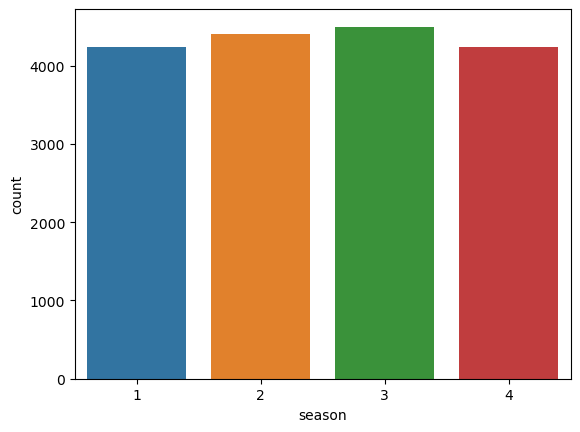

In [11]:
# Plotting bar graph for  "season" column
sns.countplot(x="season", data=df)

In [12]:
df["yr"].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

<Axes: xlabel='yr', ylabel='count'>

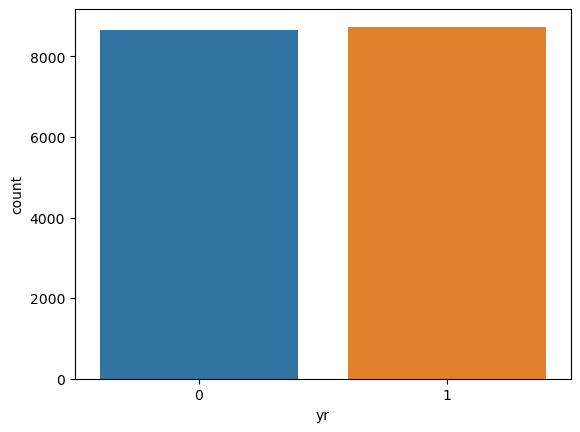

In [13]:
# Plotting  bar graph for "yr" column
sns.countplot(x="yr", data=df)


In [14]:
df["mnth"].value_counts()

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

<Axes: xlabel='mnth', ylabel='count'>

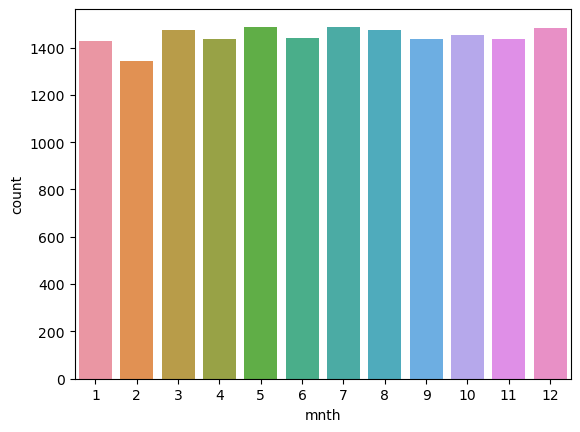

In [15]:
# Plotting bar graph for "mnth" column
sns.countplot(x="mnth", data=df)

In [16]:
df["hr"].value_counts()

17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

<Axes: xlabel='hr', ylabel='count'>

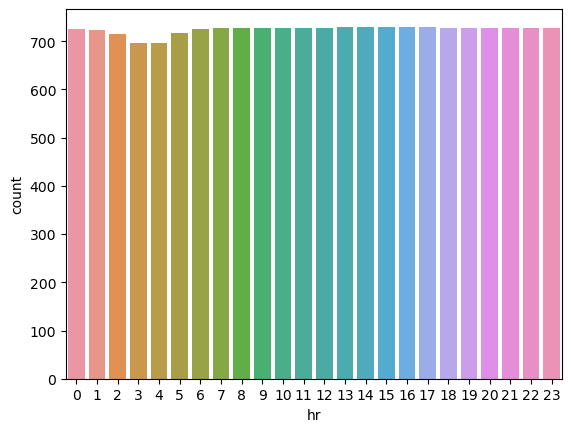

In [17]:
# Plottin bar graph for "hr" column
sns.countplot(x="hr", data=df)

In [18]:
df["holiday"].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

<Axes: xlabel='holiday', ylabel='count'>

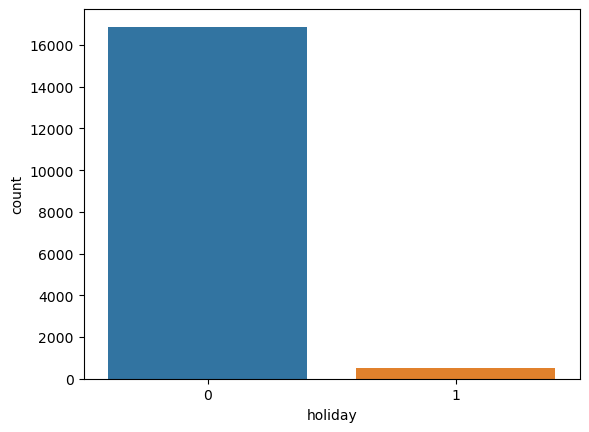

In [19]:
# Bar graph for "holiday" column
sns.countplot(x="holiday", data=df)

In [20]:
df["workingday"].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

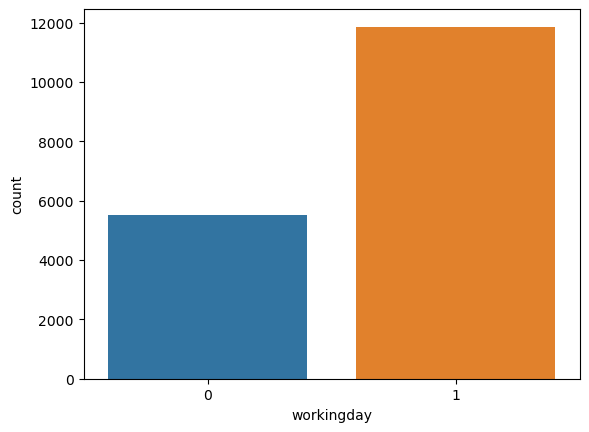

In [21]:
# Plotting  bar graph for "workingday" column
sns.countplot(x="workingday", data=df)

In [22]:
df["weathersit"].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

<Axes: xlabel='weathersit', ylabel='count'>

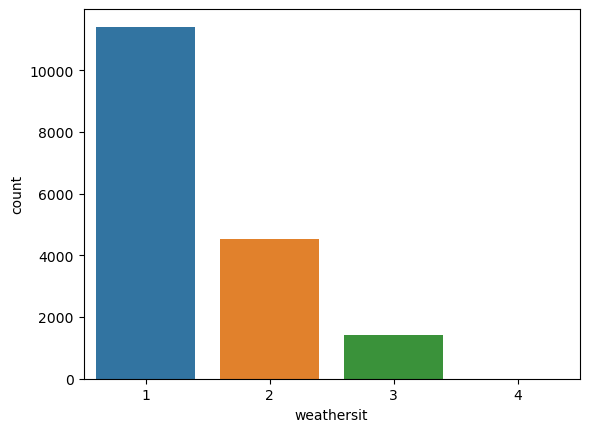

In [23]:
# Plotting  bar graph for "weathersit" column
sns.countplot(x="weathersit", data=df)

In [24]:
df["temp"].value_counts()

0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.46    559
0.26    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.06     16
0.96     16
0.98      1
1.00      1
Name: temp, dtype: int64

<Axes: xlabel='temp', ylabel='Count'>

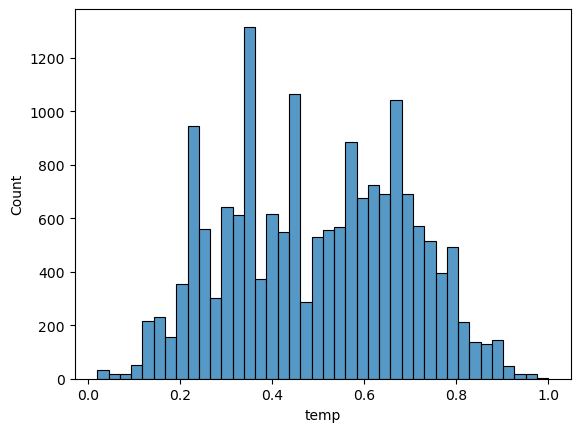

In [25]:
# Plotting histogram for "temp" column
sns.histplot(x="temp", data=df)

In [26]:
# Checking skewness for "temp" column
df["temp"].skew()

-0.00602088334827027

In [27]:
# Transformed "temp" column using log1p transformation
df["temp"] = np.log1p(df["temp"])

In [28]:
df["temp"].skew()

-0.21483209970638117

<Axes: xlabel='temp', ylabel='Count'>

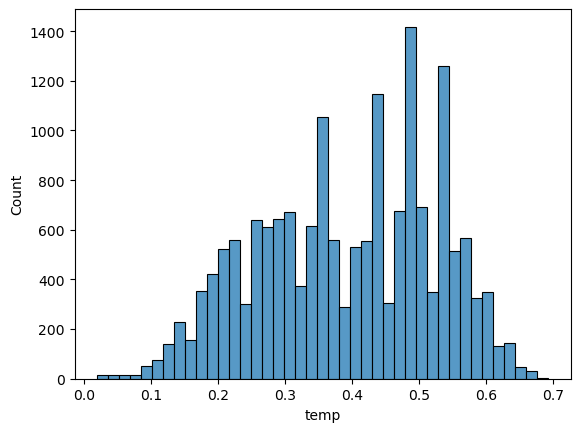

In [29]:
# Plotting histogram for "temp" column
sns.histplot(x="temp", data=df)

In [30]:
df["atemp"].value_counts()

0.6212    988
0.5152    618
0.4091    614
0.3333    600
0.6667    593
         ... 
0.0152      4
0.0000      2
0.9848      2
0.9545      1
1.0000      1
Name: atemp, Length: 65, dtype: int64

<Axes: xlabel='atemp', ylabel='Count'>

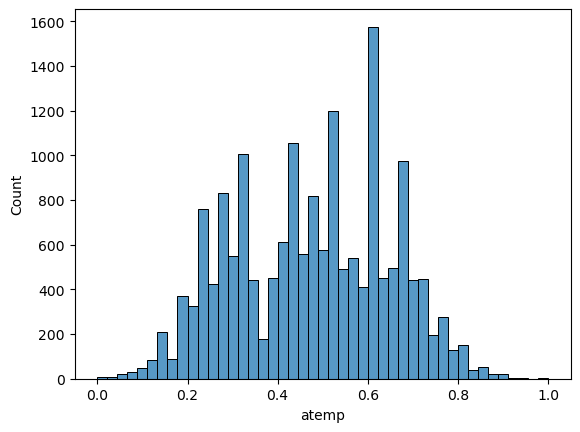

In [31]:
# Plotting histogram for "atemp" column
sns.histplot(x="atemp", data=df)

In [32]:
# Checking skewness for "atemp" column
df["atemp"].skew()

-0.09042885855903955

In [33]:
# Using log1p transformation
df["atemp"] = np.log1p(df["atemp"])

In [34]:
#  Checking skewness for "atemp" column
df["atemp"].skew()

-0.2948938568414219

<Axes: xlabel='atemp', ylabel='Count'>

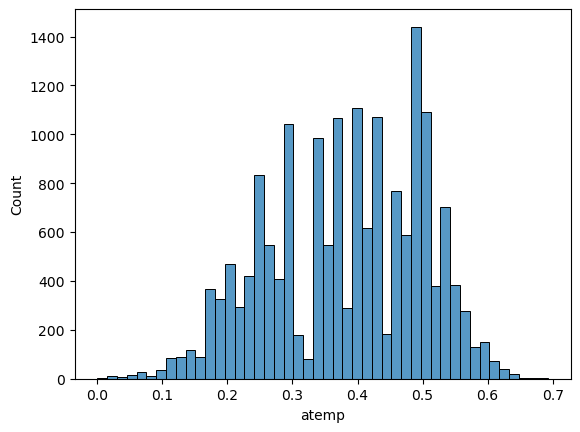

In [35]:
# Plotting histogram for "atemp" column
sns.histplot(x="atemp", data=df)

In [36]:
df["hum"].value_counts()

0.88    657
0.83    630
0.94    560
0.87    488
0.70    430
       ... 
0.12      1
0.08      1
0.10      1
0.97      1
0.91      1
Name: hum, Length: 89, dtype: int64

<Axes: xlabel='hum', ylabel='Count'>

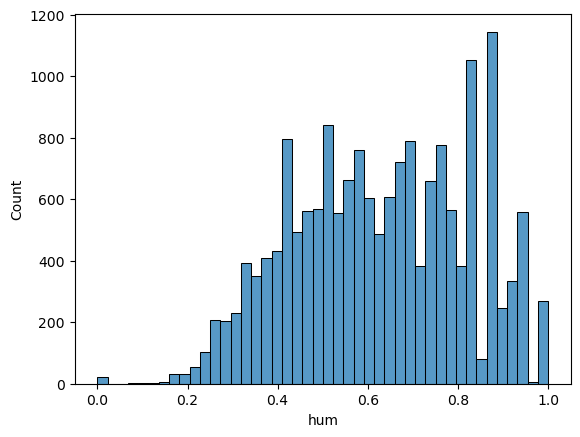

In [37]:
# Plotting histogram for "hum" column
sns.histplot(x="hum", data=df)

In [38]:
# Checking  skewness for "hum" column
df["hum"].skew()

-0.11128714936537845

In [39]:
# Using log1p transformation
df["hum"] = np.log1p(df["hum"])

In [40]:
#  Checking skewness for "hum" column
df["hum"].skew()

-0.3384412829430705

<Axes: xlabel='hum', ylabel='Count'>

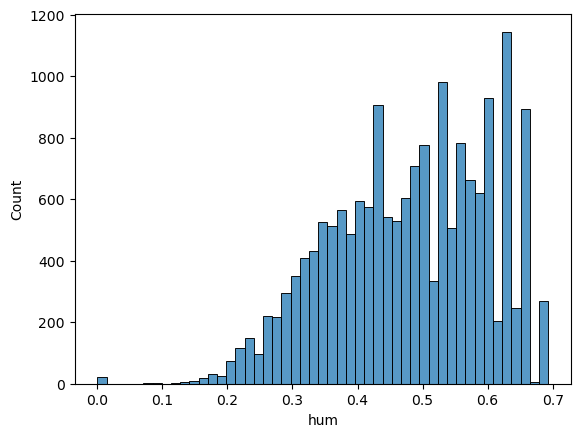

In [41]:
# Plotting histogram for "hum" column
sns.histplot(x="hum", data=df)

In [42]:
df[["windspeed"]].value_counts()

windspeed
0.0000       2180
0.1343       1738
0.1642       1695
0.1940       1657
0.1045       1617
0.2239       1513
0.0896       1425
0.2537       1295
0.2836       1048
0.2985        808
0.3284        602
0.3582        460
0.3881        381
0.4179        296
0.4478        176
0.4627        146
0.4925        112
0.5224         84
0.5821         44
0.5522         39
0.6119         23
0.6418         14
0.6567         11
0.6866          5
0.7164          2
0.7463          2
0.8060          2
0.8507          2
0.7761          1
0.8358          1
dtype: int64

<Axes: xlabel='windspeed', ylabel='Count'>

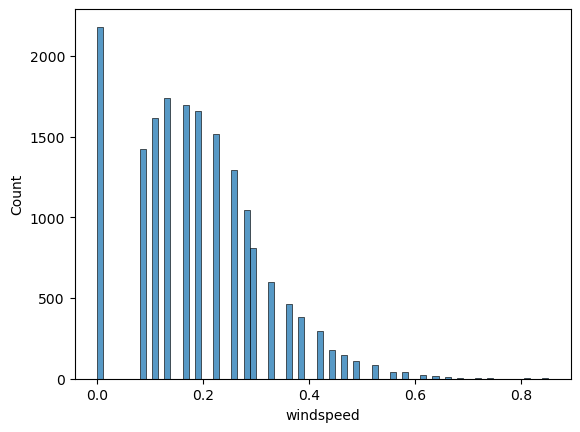

In [43]:
# Plotting histogram for "windspeed" column
sns.histplot(x="windspeed", data=df)

In [44]:
# Using  log1p transformation
df["windspeed"] = np.log1p(df["windspeed"])

In [45]:
#  Checking skewness for "windspeed" column
df["windspeed"].skew()

0.2639259184381608

<Axes: xlabel='windspeed', ylabel='Count'>

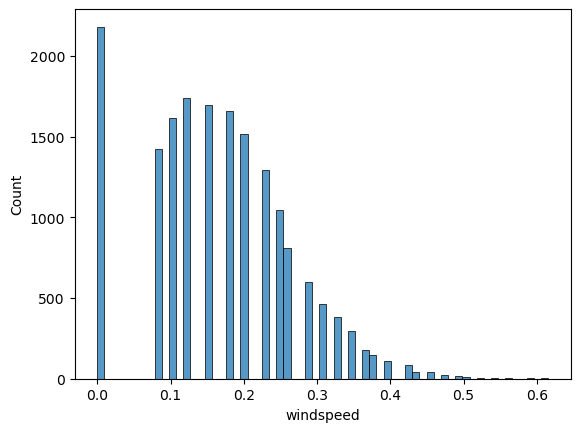

In [46]:
# Plotting histogram for "windspeed" column
sns.histplot(x="windspeed", data=df)

In [47]:
df["casual"].value_counts()

0      1581
1      1082
2       798
3       697
4       561
       ... 
332       1
361       1
356       1
331       1
304       1
Name: casual, Length: 322, dtype: int64

<Axes: xlabel='casual', ylabel='Count'>

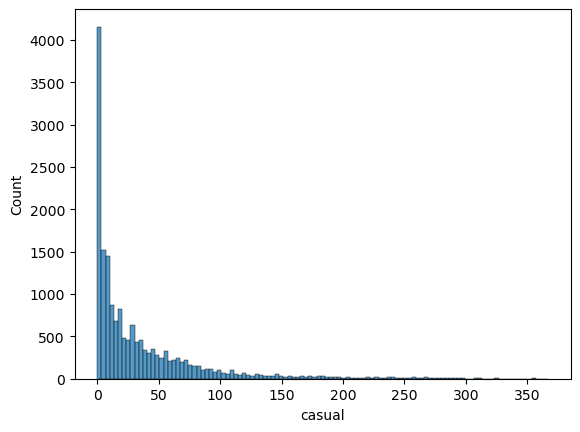

In [48]:
# Plotting histogram for "casual" column
sns.histplot(x="casual", data=df)

In [49]:
#  Checking skewness for "casual" column
df["casual"].skew()

2.499236891330847

In [50]:
#Using log1p transformation
df["casual"] = np.log1p(df["casual"])

In [51]:
#  Checking skewness for "casual" column
df["casual"].skew()

-0.23008731877828345

<Axes: xlabel='casual', ylabel='Count'>

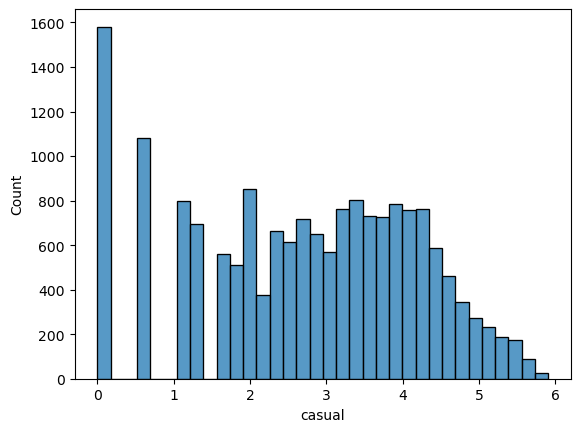

In [52]:
#  Plotting histogram for "casual" column
sns.histplot(x="casual", data=df)

In [53]:
df["registered"].value_counts()

4      307
3      294
5      287
6      266
2      245
      ... 
645      1
610      1
783      1
626      1
585      1
Name: registered, Length: 776, dtype: int64

<Axes: xlabel='registered', ylabel='Count'>

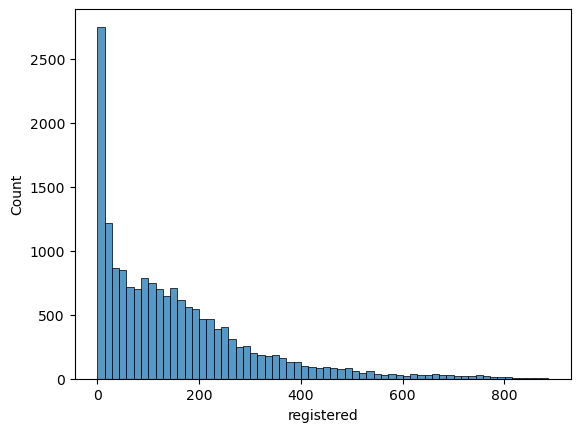

In [54]:
# Plotting histogram for "registered" column
sns.histplot(x="registered", data=df)

In [55]:
# Using log1p transformation
df["registered"] = np.log1p(df["registered"])

In [56]:
# Checking skewness for "registered" column
df["registered"].skew()

-0.8196438280984477

In [57]:
df["cnt"].value_counts()


5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: cnt, Length: 869, dtype: int64

<Axes: xlabel='cnt', ylabel='Count'>

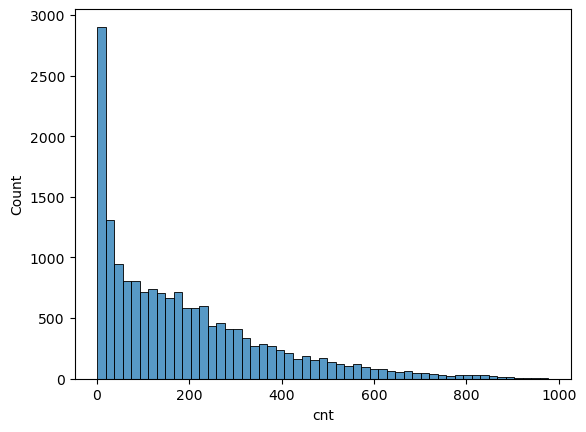

In [58]:
# Plotting histogram for "cnt" column
sns.histplot(x="cnt", data=df)

In [59]:
# Using log1p transformation
df["cnt"] = np.log1p(df["cnt"])

In [60]:
# Checking skewness for "cnt" column
df["cnt"].skew()

-0.8181803744437345

<Axes: xlabel='cnt', ylabel='Count'>

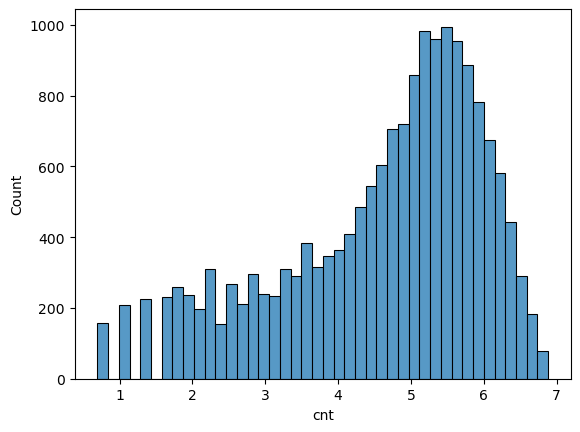

In [61]:
# Plotting histogram for "cnt" column
sns.histplot(x="cnt", data=df)

In [62]:
df["dteday"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-01-06T00:00:00.000000000',
       '2011-01-07T00:00:00.000000000', '2011-01-08T00:00:00.000000000',
       '2011-01-09T00:00:00.000000000', '2011-01-10T00:00:00.000000000',
       '2011-01-11T00:00:00.000000000', '2011-01-12T00:00:00.000000000',
       '2011-01-13T00:00:00.000000000', '2011-01-14T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-16T00:00:00.000000000',
       '2011-01-17T00:00:00.000000000', '2011-01-18T00:00:00.000000000',
       '2011-01-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-01-21T00:00:00.000000000', '2011-01-22T00:00:00.000000000',
       '2011-01-23T00:00:00.000000000', '2011-01-24T00:00:00.000000000',
       '2011-01-25T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-01-27T00:00:00.000000000', '2011-01-28

In [66]:
#df['extracted_day'] = pd.to_datetime(df['dteday']).dt.day


In [70]:

df.dtypes


season           category
yr               category
mnth             category
hr               category
holiday          category
weekday          category
workingday       category
weathersit       category
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual            float64
registered        float64
cnt               float64
extracted_day    category
dtype: object

In [71]:
#df['extracted_day'] = df['extracted_day'].astype('category')
#df.drop('extracted_date', axis=1, inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with features (X) and target variable (y)
X = df.drop('cnt', axis=1)  # Features
y = df[['cnt']]  # Target variable

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set shapes - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shapes - X_test:", X_test.shape, "y_test:", y_test.shape)


Training set shapes - X_train: (12165, 15) y_train: (12165, 1)
Testing set shapes - X_test: (5214, 15) y_test: (5214, 1)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # Handling different input types
    if isinstance(target, pd.DataFrame):
        target = target.values.ravel()

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [84]:
model_performance_regression(model, X_train, y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.080426,0.053825,0.996781,0.996777,49.648909


In [85]:
model_performance_regression(model, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082816,0.055542,0.99659,0.99658,50.431746


In [86]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Add a constant term to the features for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]

# Display the VIF values
print(vif_data)


         Variable        VIF
0           const  62.534133
1          season   3.480590
2              yr   1.068070
3            mnth   3.233548
4              hr   1.570651
5         holiday   1.079880
6         weekday   1.016122
7      workingday   1.355626
8      weathersit   1.259125
9            temp  46.513455
10          atemp  47.071411
11            hum   1.660553
12      windspeed   1.226089
13         casual   4.972133
14     registered   3.754319
15  extracted_day   1.004138


In [88]:
# Drop the 'temp' column from X_train_with_constant
X_train_with_constant_dropped_temp = X_train_with_constant.drop(['temp'], axis=1)

# Calculate VIF for each feature in the updated dataset
vif_data_dropped_temp = pd.DataFrame()
vif_data_dropped_temp["Variable"] = X_train_with_constant_dropped_temp.columns
vif_data_dropped_temp["VIF"] = [variance_inflation_factor(X_train_with_constant_dropped_temp.values, i) for i in range(X_train_with_constant_dropped_temp.shape[1])]

# Display the updated VIF values
print(vif_data_dropped_temp)


         Variable        VIF
0           const  59.823968
1          season   3.479221
2              yr   1.067744
3            mnth   3.233505
4              hr   1.570247
5         holiday   1.079078
6         weekday   1.014832
7      workingday   1.354161
8      weathersit   1.257463
9           atemp   1.867124
10            hum   1.658236
11      windspeed   1.143078
12         casual   4.966228
13     registered   3.752087
14  extracted_day   1.002811


In [89]:
# Fit the linear regression model with the updated features
model_dropped_temp = sm.OLS(y_train, X_train_with_constant_dropped_temp).fit()

# Print the summary of the updated model
print(model_dropped_temp.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.688e+05
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:33:19   Log-Likelihood:                 13399.
No. Observations:               12165   AIC:                        -2.677e+04
Df Residuals:                   12150   BIC:                        -2.666e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3457      0.006     61.263

In [90]:
# Drop the 'mnth' column from X_train_with_constant_dropped_temp
X_train_with_constant_dropped_mnth = X_train_with_constant_dropped_temp.drop(['mnth'], axis=1)

# Fit the linear regression model with the updated features
model_dropped_mnth = sm.OLS(y_train, X_train_with_constant_dropped_mnth).fit()

# Print the summary of the updated model
print(model_dropped_mnth.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.895e+05
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:33:19   Log-Likelihood:                 13399.
No. Observations:               12165   AIC:                        -2.677e+04
Df Residuals:                   12151   BIC:                        -2.667e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3457      0.006     61.264

In [91]:
# Drop the 'weathersit' column from X_train_with_constant_dropped_mnth
X_train_with_constant_dropped_weathersit = X_train_with_constant_dropped_mnth.drop(['weathersit'], axis=1)

# Fit the linear regression model with the updated features
model_dropped_weathersit = sm.OLS(y_train, X_train_with_constant_dropped_weathersit).fit()

# Print the summary of the updated model
print(model_dropped_weathersit.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.136e+05
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:33:19   Log-Likelihood:                 13399.
No. Observations:               12165   AIC:                        -2.677e+04
Df Residuals:                   12152   BIC:                        -2.668e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3456      0.006     61.284

In [92]:
# Drop the 'windspeed' and 'extracted_day' columns from X_train_with_constant_dropped_weathersit
columns_to_drop = ['windspeed', 'extracted_day']
X_train_with_constant_dropped_windspeed_extracted_day = X_train_with_constant_dropped_weathersit.drop(columns_to_drop, axis=1)

# Fit the linear regression model with the updated features
model_dropped_windspeed_extracted_day = sm.OLS(y_train, X_train_with_constant_dropped_windspeed_extracted_day).fit()

# Print the summary of the updated model
print(model_dropped_windspeed_extracted_day.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.763e+05
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:33:20   Log-Likelihood:                 13398.
No. Observations:               12165   AIC:                        -2.677e+04
Df Residuals:                   12154   BIC:                        -2.669e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3424      0.005     67.923      0.0

In [93]:
model_performance_regression(model_dropped_windspeed_extracted_day ,X_train_with_constant_dropped_windspeed_extracted_day  , y_train)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.080433,0.053829,0.996781,0.996778,1.803558


In [94]:

# Assuming X_train_with_constant_dropped_windspeed_extracted_day.columns[1:] are the features used in the model

X_test_final = sm.add_constant(X_test[X_train_with_constant_dropped_windspeed_extracted_day.columns[1:]])


In [95]:
model_performance_regression(model_dropped_windspeed_extracted_day, X_test_final, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082824,0.055533,0.996589,0.996582,1.903077


In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(dt_regressor, X_train, y_train)



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.890309e-16,7.885184e-17,1.0,1.0,4.320551e-15


In [98]:
# Evaluate the model performance on the test set
model_performance_regression(dt_regressor, X_test, y_test)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.021546,0.01125,0.999769,0.999768,0.242557


In [99]:


# Create a Decision Tree Regressor with pre-pruning (max_depth=5 for example)
dt_regressor_pruned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the pruned model on the training data
dt_regressor_pruned.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_pruned = dt_regressor_pruned.predict(X_train)
y_test_pred_pruned = dt_regressor_pruned.predict(X_test)

# Evaluate the pruned model performance on the training set
model_performance_regression(dt_regressor_pruned, X_train, y_train)



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.128978,0.10194,0.991722,0.991712,2.762984


In [100]:
# Evaluate the pruned model performance on the test set
model_performance_regression(dt_regressor_pruned, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.135317,0.106651,0.990895,0.990868,2.96097


In [101]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train.values.ravel())  # Flatten y_train if it's a DataFrame

# Make predictions on the training and test data
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(rf_regressor, X_train, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.004695,0.00207,0.999989,0.999989,0.04826


In [102]:
# Evaluate the model performance on the test set
model_performance_regression(rf_regressor, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.013104,0.005291,0.999915,0.999914,0.128669


In [103]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Decision Tree Regressor (base model)
base_model = DecisionTreeRegressor(random_state=42)

# Create a Bagging Regressor with 100 base models
bagging_regressor = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Fit the Bagging Regressor on the training data
bagging_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_bagging = bagging_regressor.predict(X_train)
y_test_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(bagging_regressor, X_train, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.004663,0.002058,0.999989,0.999989,0.048134


In [104]:
# Evaluate the model performance on the test set
model_performance_regression(bagging_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.012759,0.005243,0.999919,0.999919,0.125105


In [105]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a base Decision Tree Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)

# Create AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_ab = adaboost_regressor.predict(X_train)
y_test_pred_ab = adaboost_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(adaboost_regressor, X_train, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.178549,0.148541,0.984137,0.984117,4.295796


In [106]:
# Evaluate the model performance on the test set
model_performance_regression(adaboost_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.178773,0.148431,0.984108,0.984062,4.270895


In [107]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create Gradient Boosting Regressor
gradient_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gradient_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_gb = gradient_regressor.predict(X_train)
y_test_pred_gb = gradient_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(gradient_regressor, X_train, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.026934,0.019009,0.999639,0.999639,0.519005


In [108]:
# Evaluate the model performance on the test set
model_performance_regression(gradient_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.028388,0.019859,0.999599,0.999598,0.551321


In [109]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'extracted_day']

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Concatenate encoded features with the remaining columns
X_train_encoded = np.concatenate([X_train_encoded, X_train.drop(categorical_cols, axis=1).values], axis=1)
X_test_encoded = np.concatenate([X_test_encoded, X_test.drop(categorical_cols, axis=1).values], axis=1)

# Create XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb_regressor.fit(X_train_encoded, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_xgb = xgb_regressor.predict(X_train_encoded)
y_test_pred_xgb = xgb_regressor.predict(X_test_encoded)

# Evaluate the model performance on the training set
model_performance_regression(xgb_regressor, X_train_encoded, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.00956,0.007028,0.999955,0.999954,0.169779


In [110]:
# Evaluate the model performance on the test set
model_performance_regression(xgb_regressor, X_test_encoded, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.017022,0.010807,0.999856,0.999854,0.26715


In [111]:
# Model Comparison Summary

import pandas as pd

# Data for the models
data = {
    'Model': ['Linear Regression (sklearn)', 'Linear Regression (statsmodel)', 'Decision Tree (Base)',
              'Decision Tree (Pre Pruning)', 'Random Forest', 'Bagging', 'Adaboost', 'Gradient Boosting', 'XG Boost'],
    
    'Train_RMSE': [0.080426, 0.080433, 2.890309e-16, 0.128978, 0.004695, 0.178549, 0.178549, 0.026934, 0.017022],
    'Train_MAE': [0.053825, 0.053829, 7.885184e-17, 0.10194, 0.00207, 0.148541, 0.148541, 0.019009, 0.010807],
    'Train_R-squared': [0.996781, 0.996781, 1.0, 0.991722, 0.999989, 0.984137, 0.984137, 0.999639, 0.999856],
    'Train_Adj. R-squared': [0.996777, 0.996778, 1.0, 0.991712, 0.999989, 0.984117, 0.984117, 0.999639, 0.999854],
    'Train_MAPE': [1.80341, "Nan", 4.320551e-15, 2.762984, 0.04826, 4.295796, 4.295796, 0.519005, 0.26715],
    
    'Test_RMSE': [0.082816, 0.082824, 0.021546, 0.135317, 0.013104, 0.178773, 0.178773, 0.028388, 0.017022],
    'Test_MAE': [0.055542, 0.055533, 0.01125, 0.106651, 0.005291, 0.148431, 0.148431, 0.019859, 0.010807],
    'Test_R-squared': [0.99659, 0.996589, 0.999769, 0.990895, 0.999915, 0.984108, 0.984108, 0.999599, 0.999856],
    'Test_Adj. R-squared': [0.99658, 0.996582, 0.999768, 0.990868, 0.999914, 0.984062, 0.984062, 0.999598, 0.999854],
    'Test_MAPE': [1.903541, "Nan", 0.242557, 2.96097, 0.128669, 4.270895, 4.270895, 0.551321, 0.26715]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the comparison summary
df

,Model,Train_RMSE,Train_MAE,Train_R-squared,Train_Adj. R-squared,Train_MAPE,Test_RMSE,Test_MAE,Test_R-squared,Test_Adj. R-squared,Test_MAPE
0,Linear Regression (sklearn),8.042600e-02,5.382500e-02,0.996781,0.996777,1.80341,0.082816,0.055542,0.996590,0.996580,1.903541
1,Linear Regression (statsmodel),8.043300e-02,5.382900e-02,0.996781,0.996778,Nan,0.082824,0.055533,0.996589,0.996582,Nan
2,Decision Tree (Base),2.890309e-16,7.885184e-17,1.000000,1.000000,0.0,0.021546,0.011250,0.999769,0.999768,0.242557
3,Decision Tree (Pre Pruning),1.289780e-01,1.019400e-01,0.991722,0.991712,2.762984,0.135317,0.106651,0.990895,0.990868,2.96097
4,Random Forest,4.695000e-03,2.070000e-03,0.999989,0.999989,0.04826,0.013104,0.005291,0.999915,0.999914,0.128669
5,Bagging,1.785490e-01,1.485410e-01,0.984137,0.984117,4.295796,0.178773,0.148431,0.984108,0.984062,4.270895
6,Adaboost,1.785490e-01,1.485410e-01,0.984137,0.984117,4.295796,0.178773,0.148431,0.984108,0.984062,4.270895
7,Gradient Boosting,2.693400e-02,1.900900e-02,0.999639,0.999639,0.519005,0.028388,0.019859,0.999599,0.999598,0.551321
8,XG Boost,1.702200e-02,1.080700e-02,0.999856,0.999854,0.26715,0.017022,0.010807,0.999856,0.999854,0.26715


In [112]:
# Fit the model on the entire dataset
rf_regressor.fit(X, y.values.ravel())

# Make predictions on the entire dataset
y_pred_rf = rf_regressor.predict(X)

# Evaluate the model performance
print("Model Metrics:")
model_performance_regression(rf_regressor, X, y.values.ravel())


Model Metrics:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.00385,0.001581,0.999993,0.999993,0.036334
